In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\hillarik\Desktop\MLzoomcamp\data\laptops.csv")

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.columns =df.columns.str.lower().str.replace(' ','_')

In [6]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [11]:
# Select the specified columns
df_filtered = df[['ram', 'storage', 'screen', 'final_price']]


In [12]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [13]:
# Check for missing values in the filtered columns
df_filtered.isnull().sum()


ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [15]:
print(df_filtered['ram'].dtype)
if df_filtered['ram'].dtype == 'object':
    df_filtered['ram'] = df_filtered['ram'].str.replace('GB', '').astype(int)
# Calculate the median of 'ram'
ram_median = df_filtered['ram'].median()
print(ram_median)



int64
16.0


In [16]:
for  col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print() 

laptop
['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"'
 'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"'
 'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"'
 'MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6"'
 'HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6"']
2160

status
['New' 'Refurbished']
2

brand
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo']
27

model
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair']
121

cpu
['Intel Core i5' 'Intel Celeron' 'Intel Core i3' 'Intel Core i7'
 'AMD Ryzen 5']
28

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

storage_type
['SSD' 'eMMC' nan]
2

gpu
[nan 'RTX 3050' 'RTX 4060' 'RTX 4050' 'RTX 3060']
44

screen
[15.6 17.3 14.  16.1 13.3]
29

touch
['No' 'Yes']
2

final_price
[1009.    299.    789.   1199.    669.01]
1440



In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

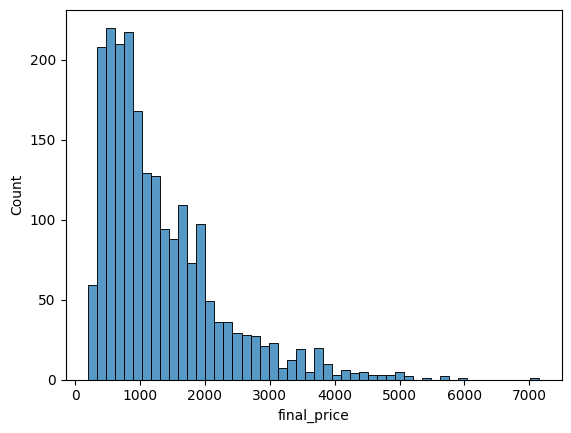

In [31]:
#sns.histplot(df.final_price, bins=50)
sns.histplot(df.final_price[df.final_price < 100000], bins=50)

In [26]:
np.log1p([0,1,100,1000,100000])

array([ 0.        ,  0.69314718,  4.61512052,  6.90875478, 11.51293546])

In [27]:
price_logs= np.log1p(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

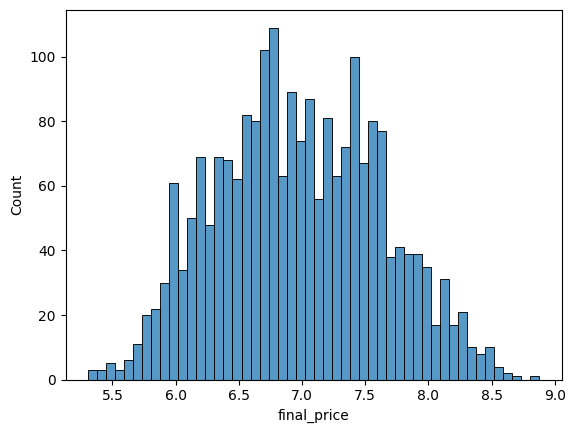

In [28]:
sns.histplot(price_logs, bins=50)

In [33]:
len(df)


2160

In [35]:
n=len(df)
n_val =int(n*0.2)
n_test =int(n*0.2)
n_train = (n-n_val-n_test)


In [36]:
(n,n_val+n_test+n_train)

(2160, 2160)

In [45]:
df_train=df.iloc[n_train]
df_val=df.iloc[n_train:n_train+n_val]
df_test=df.iloc[n_train+n_val:]
idx =np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]  # Training set
df_val = df.iloc[idx[n_train:n_train+n_val]]  # Validation set
df_test = df.iloc[idx[n_train+n_val:]]  # Test set



In [50]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [51]:
len(df_train),len(df_val),len(df_test)

(1296, 432, 432)

In [52]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [53]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [54]:
len(y_train)

1296

In [46]:
# Fill missing values with 0
df_train_zero = df_train.fillna(0)
df_val_zero = df_val.fillna(0)
df_test_zero = df_test.fillna(0)


In [47]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [65]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  # Create an array of ones for the intercept
    X = np.column_stack([ones, X])  # Add the intercept column to the features

    # Calculate weights using the normal equation
    XTX = X.T.dot(X)  # X transpose times X
    XTX_inv = np.linalg.inv(XTX)  
    w = XTX_inv.dot(X.T).dot(y)  
    
    return w[0], w[1:]
X_train_zero = df_train_zero[['ram', 'storage', 'screen']].values  # Feature matrix
y_train = df_train_zero['final_price'].values  # Target variable

# Using custom fxn to train the linear regression model
intercept_zero, weights_zero = train_linear_regression(X_train_zero, y_train)
print(f"Intercept: {intercept_zero}")
print(f"Weights: {weights_zero}")

Intercept: 676.8954853003862
Weights: [ 43.70681555   0.86506867 -36.10399833]


In [66]:
#validation data
X_val_zero = df_val_zero[['ram', 'storage', 'screen']].values  # Feature matrix for validation
y_val = df_val_zero['final_price'].values  # Target variable for validation
ones_val = np.ones(X_val_zero.shape[0])  # Creating an array of ones for intercept
X_val_zero_with_ones = np.column_stack([ones_val, X_val_zero])  # Adding intercept column

# Making predictions using the weights
y_pred_zero = X_val_zero_with_ones.dot(np.concatenate([[intercept_zero], weights_zero]))

# Calculating RMSE for the validation set
rmse_zero = np.sqrt(np.mean((y_val - y_pred_zero) ** 2))  # Manual RMSE calculation
print(f"RMSE (fill with 0, custom model): {round(rmse_zero, 2)}")


RMSE (fill with 0, custom model): 597.36


In [68]:
# with mean
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  
    XTX = X.T.dot(X)  # X transpose times X
    XTX_inv = np.linalg.inv(XTX)  # Inverse of XTX
    w = XTX_inv.dot(X.T).dot(y)  # Calculate the weights
    
    return w[0], w[1:]  
mean_ram = df_train_zero['ram'].mean()
df_train_mean = df_train_zero.copy()
df_train_mean['ram'] = df_train_mean['ram'].fillna(mean_ram)

df_val_mean = df_val_zero.copy()
df_val_mean['ram'] = df_val_mean['ram'].fillna(mean_ram) 
X_train_mean = df_train_mean[['ram', 'storage', 'screen']].values  # Feature matrix
y_train_mean = df_train_mean['final_price'].values  # Target variable
X_val_mean = df_val_mean[['ram', 'storage', 'screen']].values  # Feature matrix for validation
y_val_mean = df_val_mean['final_price'].values  # Target variable for validation
intercept_mean, weights_mean = train_linear_regression(X_train_mean, y_train_mean)
print(f"Intercept (fill with mean): {intercept_mean}")
print(f"Weights (fill with mean): {weights_mean}")
ones_val_mean = np.ones(X_val_mean.shape[0])  # Creating an array of ones for intercept
X_val_mean_with_ones = np.column_stack([ones_val_mean, X_val_mean])  # Adding intercept column

# Making predictions using the weights
y_pred_mean = X_val_mean_with_ones.dot(np.concatenate([[intercept_mean], weights_mean]))

# Calculating RMSE for the validation set
rmse_mean = np.sqrt(np.mean((y_val_mean - y_pred_mean) ** 2))
print(f"RMSE (fill with mean, custom model): {round(rmse_mean, 2)}")




Intercept (fill with mean): 676.8954853003862
Weights (fill with mean): [ 43.70681555   0.86506867 -36.10399833]
RMSE (fill with mean, custom model): 597.36


## REGUALARISED LINEAR REGRESSION 

In [16]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\hillarik\Desktop\MLzoomcamp\data\laptops.csv")
df.columns =df.columns.str.lower().str.replace(' ','_')
df_filtered = df[['ram', 'storage', 'screen', 'final_price']]
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
 n = len(df)
train_size = int(0.6 * n)
val_size = int(0.2 * n)

# Split the dataset
df_train_zero = df.iloc[:train_size]  # First 60% for training
df_val_zero = df.iloc[train_size:train_size + val_size]  # Next 20% for validation

#  filling  the missing values and prepare the features
X_train_zero = df_train_zero[['ram', 'storage', 'screen']].fillna(0).values  # Fill NAs with 0 
y_train = df_train_zero['final_price'].values  # Target variable 

X_val_zero = df_val_zero[['ram', 'storage', 'screen']].fillna(0).values  # Fill NAs with 0 
y_val = df_val_zero['final_price'].values  # Target variable

# regualarization
regularization_params = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_results = []

In [18]:
for r in regularization_params:
# Training the Ridge Regression model for each r
    intercept_zero, weights_zero = train_ridge_regression(X_train_zero, y_train, r)
    
# Adding the intercept to the validation data
    X_val_zero_with_ones = np.column_stack([np.ones(X_val_zero.shape[0]), X_val_zero])
    
# Making predictions
    y_pred_zero = X_val_zero_with_ones.dot(np.concatenate([[intercept_zero], weights_zero]))
    
 # Calculating RMSE
    rmse = np.sqrt(np.mean((y_val - y_pred_zero) ** 2))
    rmse_results.append((r, rmse))
    
    print(f"r={r}: RMSE={round(rmse, 2)}")

# Finding the best r 
best_r, best_rmse = min(rmse_results, key=lambda x: x[1])
print(f"Best r: {best_r}, Best RMSE: {round(best_rmse, 2)}")

r=0: RMSE=734.72
r=0.01: RMSE=734.72
r=0.1: RMSE=734.72
r=1: RMSE=734.72
r=5: RMSE=734.73
r=10: RMSE=734.73
r=100: RMSE=734.86
Best r: 0, Best RMSE: 734.72


##QUESTION 5

In [21]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\hillarik\Desktop\MLzoomcamp\data\laptops.csv")
df.columns =df.columns.str.lower().str.replace(' ','_')
df_filtered = df[['ram', 'storage', 'screen', 'final_price']]
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  # Creating an array of ones for the intercept
    X = np.column_stack([ones, X])  # Adding the intercept column to the features

    # Calculating weights using the normal equation
    XTX = X.T.dot(X)  # X transpose times X
    XTX_inv = np.linalg.inv(XTX)  # Inverse of XTX
    w = XTX_inv.dot(X.T).dot(y)  # Calculating the weights
    
    return w[0], w[1:]  # Return the intercept and weights

# Storing RMSE results
rmse_scores = []
# different seed values to capture rang(0,1,2,3,4,5,6,7,8,9)
for seed in range(10):
    # Shuffling and spliting the dataset manually using the seed
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    # Spliting the data: 60% train, 20% validation, 20% test
    train_size = int(0.6 * len(df_shuffled))
    val_size = int(0.2 * len(df_shuffled))
    
    df_train = df_shuffled.iloc[:train_size]
    df_val = df_shuffled.iloc[train_size:train_size + val_size]
    
    # Fill missing values with 0
    X_train = df_train[['ram', 'storage', 'screen']].fillna(0).values  # Features for training
    y_train = df_train['final_price'].fillna(0).values  # Target variable for training
    
    X_val = df_val[['ram', 'storage', 'screen']].fillna(0).values  # Features for validation
    y_val = df_val['final_price'].fillna(0).values  # Target variable for validation

    # Training the linear regression model
    intercept, weights = train_linear_regression(X_train, y_train)

    # Adding intercept to validation data
    X_val_with_ones = np.column_stack([np.ones(X_val.shape[0]), X_val])
    
    # Making predictions
    y_pred = X_val_with_ones.dot(np.concatenate([[intercept], weights]))

    # Calculating RMSE
    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
    rmse_scores.append(rmse)

# Calculating standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)
print(f"RMSE Scores: {rmse_scores}")
print(f"Standard Deviation of RMSE: {round(std_rmse, 3)}")



RMSE Scores: [565.4520868770983, 636.7985423056728, 588.9558697907958, 597.8148920012524, 571.9627915111038, 573.2383256618933, 647.343832840719, 550.4398184485982, 587.3335036169883, 576.1017929433114]
Standard Deviation of RMSE: 29.176


##QUESTION 6

In [27]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\hillarik\Desktop\MLzoomcamp\data\laptops.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_filtered = df[['ram', 'storage', 'screen', 'final_price']]


In [28]:
np.random.seed(9)
df_shuffled = df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset


In [29]:
# Creating datasets
df_train_val = df_shuffled[:train_size + val_size]
df_test = df_shuffled[train_size + val_size:]

# split into train and validation, using copy()
df_train = df_train_val[:train_size].copy()
df_val = df_train_val[train_size:].copy()

# Filling missing values with 0
df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)
df_test = df_test.copy()  # Make a copy for the test set
df_test.fillna(0, inplace=True)


In [30]:
X_train_val = df_train[['ram', 'storage', 'screen']].values
y_train_val = df_train['final_price'].values


In [31]:
def train_ridge_regression(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    identity_matrix = np.eye(X.shape[1])
    identity_matrix[0, 0] = 0  # Don't regularize the intercept
    XTX = X.T.dot(X) + r * identity_matrix
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

r = 0.001
intercept, weights = train_ridge_regression(X_train_val, y_train_val, r)


In [32]:
X_test = df_test[['ram', 'storage', 'screen']].fillna(0).values
y_test = df_test['final_price'].values

X_test_with_ones = np.column_stack([np.ones(X_test.shape[0]), X_test])

y_pred = X_test_with_ones.dot(np.concatenate([[intercept], weights]))


In [33]:
rmse_test = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE on the test dataset: {round(rmse_test, 2)}")


RMSE on the test dataset: 614.11
